# Introduction
In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc.

In [46]:
# Importing Pandas
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import seaborn as sns

# What can we say about the dataset?
* The columns `budget`, `revenue`, `budget_adj`, `revenue_adj` has not given us the currency but for this dataset we will assume that it is in dollars.
* The vote count for each movie is not similar, So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.

# Questions to be Answered
* Q1 : Which movie had the greatest and least budget?
* Q2 : Which movie earns the most and least profit?
* Q3 : What is the average runtime of all movies?
* Q4 : In which year we had the most movies making profits?
* Q5: Which directer directed most films?
* Q6 : Which genre were more successful?
* Q7 : Which month released highest number of movies in all of the years? And which month made the most profit?



# Data Cleaning
Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.

First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.

Columns to delete -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [34]:
#reading tmdb csv file and storing that to a variable
tmdb = pd.read_csv('tmdb-movies.csv')

#calling out first 100 rows (excluding headers) of tmdb database
tmdb.head(101)


#lets give a list of movies that needs to be deleted
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
movie_data = tmdb.drop(del_col, 1)
#now take a look at this new dataset
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [36]:
# Describing TMDB Data
movie_data.describe()

,budget,revenue,runtime,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [37]:
# Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
tagline           8042 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


In [38]:
sum(movie_data.duplicated())

1

In [39]:
movie_data.drop_duplicates(inplace=True)

In [40]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
tagline           8041 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(6)
memory usage: 933.7+ KB


In [41]:
movie_data.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [42]:
movie_data.describe()

,budget,revenue,runtime,release_year
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [43]:
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [44]:
movie_data.drop_duplicates(keep = 'first', inplace = True)

We had total 10865 movies in total.We had one duplicate copy of a movie. Now we have 10864 movies.

Now, lets figure out which movies have a value of '0' in their budget or revenue, and then deleting those movies from database.

In [47]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

In [48]:
movie_data

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
5,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015
6,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2015
7,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,2015
8,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2015
9,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,2015


As you saw in the previous dataset from having 10k+ rows and 21 columns we have now come down to 3854 rows and 10 columns. These many columns are needed for analysis and we have all the rows that have valid values for our calculations.

Now as we are done with cleaning the dataset, let's move on to data wrangling phase. 

# Data Wrangling
Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

And then we need to convert the 'release_date' column to date format

In [49]:

#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

#calling the column which need to be formatted in datetime and storing those values in them
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#showing the dataset
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


As you see, the 'release_date' column has been changed to date format. (year-month-day)

Lets see if all the columns are in the format that we want for our calculations.

In [50]:
movie_data.dtypes


budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

As we can see we have float values for 'budget' and 'revenue' columns, since we dont need float but in int datatype, lets convert them.

In [51]:

#applymap function changes the columns data type to the type 'argument' we pass
change_coltype = ['budget', 'revenue']

movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
movie_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Now all columns are in the desired format.

Since the values in the column 'budget' and 'revenue' shows us in Currency of US (as assumed earlier), lets change the name of these columns for convenience.

In [52]:
movie_data.rename(columns = {'budget' : 'budget_(in_US$)', 'revenue' : 'revenue_(in_US$)'}, inplace = True)

In [53]:
movie_data

,budget_(in_US$),revenue_(in_US$),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,2015-12-25,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,2015-09-30,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,2015-06-17,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,2015-06-09,2015


In [54]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(2, 'profit', movie_data['revenue_(in_US$)'] - movie_data['budget_(in_US$)'])

#for just in case situations or for convenience, we change the data type to int
movie_data['profit'] = movie_data['profit'].apply(np.int64)

#showing the dataset
movie_data.head()

,budget_(in_US$),revenue_(in_US$),profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked. 



# Q1 : Which movie had the greatest and least budget?

In [59]:
def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = movie_data[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data



In [60]:
highest_lowest('budget_(in_US$)')

,2244,2618
budget_(in_US$),425000000,1
revenue_(in_US$),11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Ans : The Warrior's Way	

# Q2 : Which movie earns the most and least profit?

In [58]:
#calling the function and passing the argument
highest_lowest('profit')

,1386,2244
budget_(in_US$),237000000,425000000
revenue_(in_US$),2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


 Ans : Avatar with $2781505847

# Q3 : What is the average runtime of all movies?

In [61]:
def average_func(column_name):
    
    return movie_data[column_name].mean()

In [62]:
average_func('runtime')

109.22029060716139

Ans : 109.22029060716139

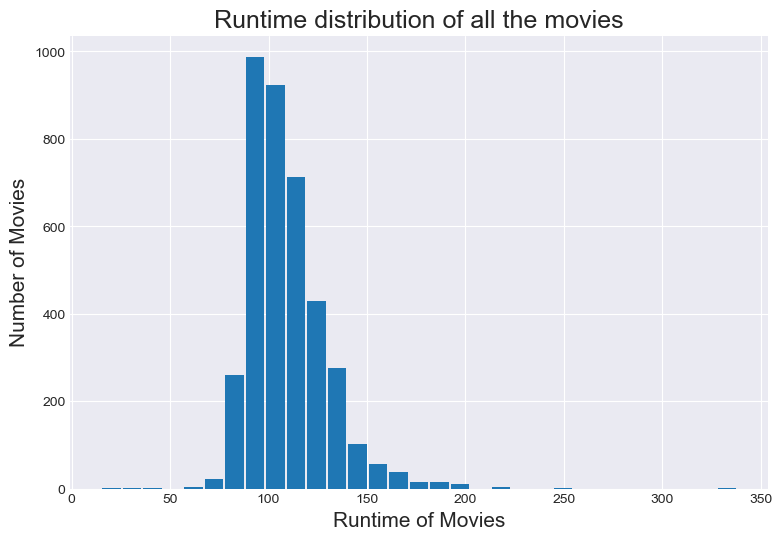

In [63]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

Opinion : as you can see the tallest bar here is time interval between 85-100 min(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. So we can also say from this graph that mode time of movies is around 85-110 min, has the highest concentration of data points around this time interval. The distribution of this graph is positively skewed or right skewed!

# Q4 : In which year we had the most movies making profits?

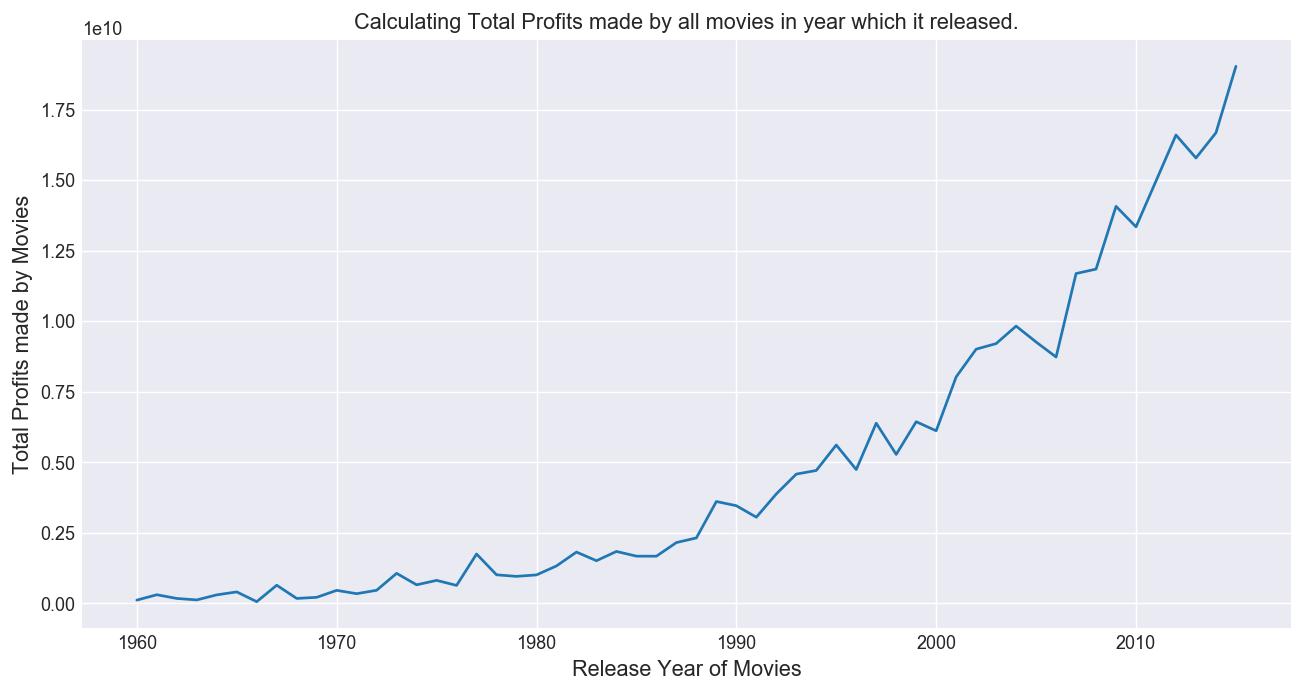

2015

In [68]:
profits_each_year = movie_data.groupby('release_year')['profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

#shows which year made the highest profit
profits_each_year.idxmax()

Opinion : Before i explain lets understand what the y axis shows us. Each values in the y-axis is been multiplied to '1e10' (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis. So for example at the year 2010, the y-aixs value is around 1.35, which means that the profit at that year made by al movies released in that year is 1.35x1e10 =  13500000000 which is 13.5 billion dollars.

The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

Also to note, In the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie Avatar in 2009 alone drags the profit up by 2.5 billion dollars out of 14 billion dollars

In [69]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
profits_each_year.tail()

,profit
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


# Q5: Which directer directed most films?

In [70]:
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [72]:
#assinging new dataframe which holds values only of movies having profit $100k or more
profit_movie_data = movie_data.query('profit >= 50000000')

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head(2)

,budget_(in_US$),revenue_(in_US$),profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [73]:
#this will variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
dtype: int64

Opinion : 'Steven Spielberg' takes the crown! Directing 23 movies over $50M+ in profit, Also the other directors following along the list such as 'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc prove to be really great directors. Movies directed by these directors is more likely for a movie to make huge profits, the higher the movies they direct that earn huge profits, the higher the probability for a movie to go for success! Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always earn this much but gives us the idea that how much likely it is when it is directed by them.



# Q6 : Which genre were more successful?

In [74]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

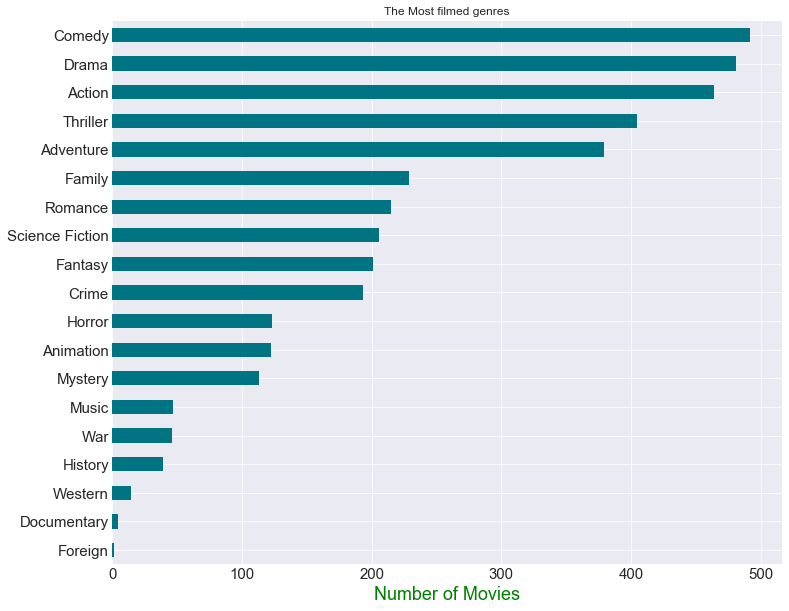

In [75]:
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Opinion : Another amazing results. Action, Drama and Comedy genres are the most as visualized but Comedy takes the prize, about 492 movies have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. 

# Q7 : Which month released highest number of movies in all of the years? And which month made the most profit?

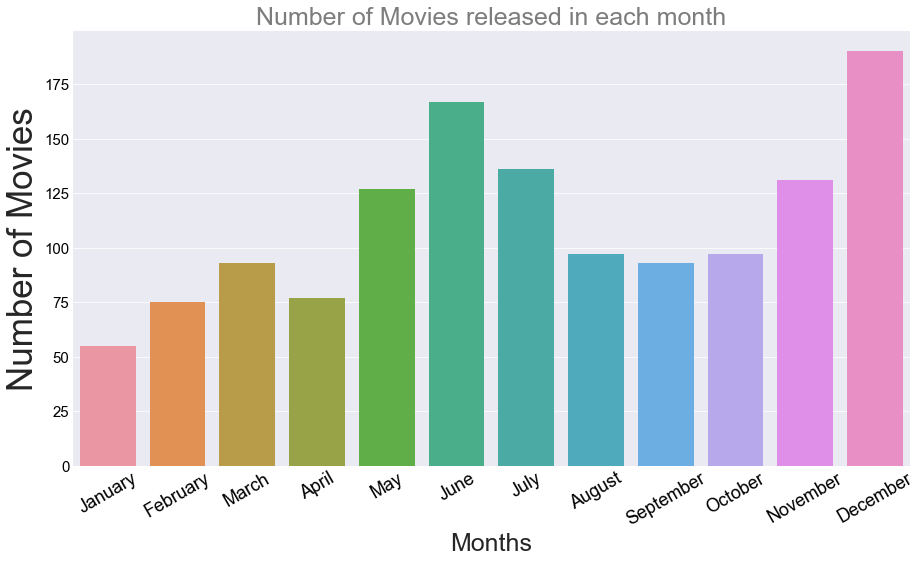

In [84]:
####### Which month released highest number of movies in all of the years

#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index.profit.count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count.profit, data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month',  fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months",  fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies",  fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

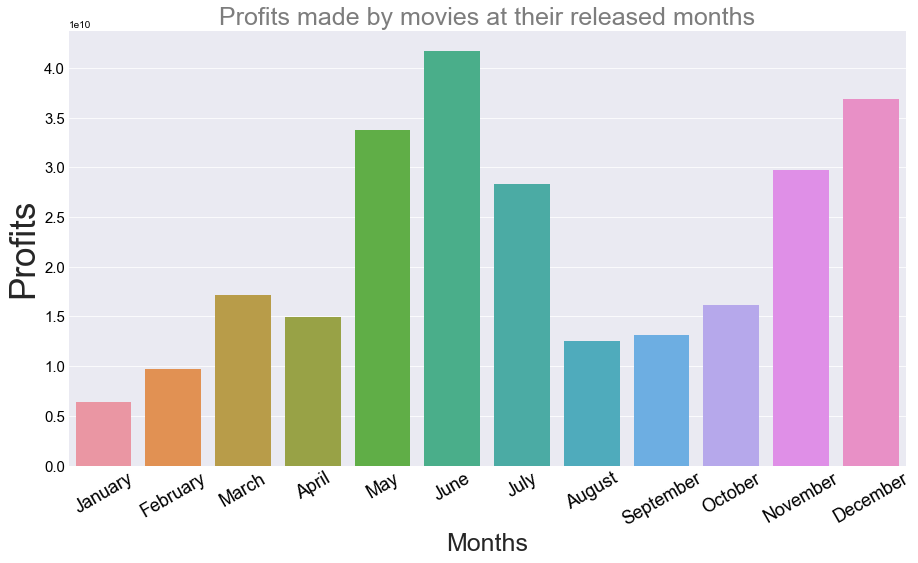

In [85]:
######### which month made the most profit

#now since the data is grouped by month, we add 'profit' values to respective months, saving all this to a new var
monthly_profit = groupby_index.profit.sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit.profit, data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months',fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()


Opinion : 
Seeing the both visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but just not for one month i.e December. December is the month where most movie release but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around 165 movie releases, which is second highest, is the highest in terms of making profits.

Also one more thing is we earlier finded which movie had made the most profit in our dataset, We came up with the answer of movie,  'Avatar', and the release month for this movie is in december, also the highest in loss movie had also released in december but that isn't being counted here. Knowing this that you have the highest release rate and highest profit making movie in same month of December but falls short in front of June month in terms of making profits makes me think that the month of June had movies with significant high profits where in december it didn't had that much high, making it short in terms of profit even though having the advantage of highest release rate.

This visualization doesn't prove us that if we release a movie in those months we will earn more $50M. It just makes us think that the chances are higher, again it depends on other influential factors, such as directors, story, cast etc. 

# Conclusion
As i have answered the questions that i thought would be interesting to dig into, i want to wrap up all my findings in this way ....

Q. If i wanted to show one of the best and most profitable movie, who would i hire as director and cast, which genre would i choose and also at what month would i release the movie in?

Ans. I would..

Limitations - I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.There is no normalization or exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed. 

And that's my conclusion!

Reference : 
    https://matplotlib.org/users/pyplot_tutorial.html
    https://plot.ly/matplotlib/bar-charts/
    http://cs231n.github.io/python-numpy-tutorial/
    https://seaborn.pydata.org/
    https://docs.python.org/2/library/datetime.html
    https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
    
        